# James S Dietz
## HW 5 Matplotlib
## Pymaceuticals

In [66]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.pyplot import figure

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mousedataload = "mouse_drug_data.csv"
clinicaldataload = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mousedata = pd.read_csv(mousedataload)
clinicaldata = pd.read_csv(clinicaldataload)

# Combine the data into a single dataset

mousetrial = pd.merge(mousedata, clinicaldata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview



# A. Preliminary Examination of Data

In [2]:
mousedata.head()


,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [3]:
clinicaldata.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
mousetrial.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [5]:
mousetrial.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1906.000000,1906.000000,1906.000000
mean,19.538300,50.468120,1.018363
std,14.064786,8.869571,1.135991
min,0.000000,22.050126,0.000000
25%,5.000000,45.000000,0.000000
50%,20.000000,48.991921,1.000000
75%,30.000000,56.288484,2.000000
max,45.000000,78.567014,4.000000


In [6]:
list(mousetrial)

['Mouse ID', 'Drug', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites']

In [7]:
mousetrial.rename(columns={'Tumor Volume (mm3)':'volume'}, inplace=True)
mousetrial.head()

,Mouse ID,Drug,Timepoint,volume,Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


# B. Examining Tumor Response To Treatment

In [75]:
# Grouping by Drug and Timepoint, mungling, calculating errors, and then using loc function to plot a line for each
# drug's effect on tumor volume.


In [8]:
#groupby
druggroups = mousetrial.groupby(['Drug', 'Timepoint']).mean().reset_index()
druggroups.head()

,Drug,Timepoint,volume,Metastatic Sites
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.160000
2,Capomulin,10,43.084291,0.320000
3,Capomulin,15,42.064317,0.375000
4,Capomulin,20,40.716325,0.652174


In [10]:
#Will actually use this later to serve as axis labels of bar chart.
druglist = druggroups['Drug'].unique()
druglist

array(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
       'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype=object)

In [11]:
#Calculating standard error on volume.
semgroups = mousetrial.groupby(['Drug', 'Timepoint']).sem().reset_index()
semgroups.head()

,Drug,Timepoint,Metastatic Sites,Mouse ID,volume
0,Capomulin,0,0.000000,NaN,0.000000
1,Capomulin,5,0.074833,NaN,0.448593
2,Capomulin,10,0.125433,NaN,0.702684
3,Capomulin,15,0.132048,NaN,0.838617
4,Capomulin,20,0.161621,NaN,0.909731


In [12]:
#dropped unnecessary columns
semgroups.drop(columns=['Metastatic Sites', 'Mouse ID'], inplace=True)
semgroups.head()

,Drug,Timepoint,volume
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [13]:
#rename column to reflect that it is actually the Std Errors.
semgroups.rename(columns={'volume':'se_volume'}, inplace=True)
semgroups.head()

,Drug,Timepoint,se_volume
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [14]:
#Merge tables
volumegroups = pd.merge(druggroups, semgroups, how='left').set_index("Drug")
volumegroups.head()

,Timepoint,volume,Metastatic Sites,se_volume
Drug,,,,
Capomulin,0,45.000000,0.000000,0.000000
Capomulin,5,44.266086,0.160000,0.448593
Capomulin,10,43.084291,0.320000,0.702684
Capomulin,15,42.064317,0.375000,0.838617
Capomulin,20,40.716325,0.652174,0.909731


In [15]:
#created table that is useful in examining changes in tumor volume for each drug.
volumepivot = volumegroups.pivot_table(values='volume', index=['Timepoint'], columns=['Drug'])
volumepivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [17]:
#Above table is good for visual inspection but not for plotting.  Loc function allows me to isolate data
#for each specific drug and plot the line.
capomulin = volumegroups.loc['Capomulin']
ceftamin = volumegroups.loc['Ceftamin']
infubinol = volumegroups.loc['Infubinol']
ketapril = volumegroups.loc['Ketapril']
naftisol = volumegroups.loc['Naftisol']
placebo = volumegroups.loc['Placebo']
ramicane = volumegroups.loc['Ramicane']
stelasyn = volumegroups.loc['Stelasyn']
zoniferol = volumegroups.loc['Zoniferol']

In [18]:
#visual inspection to verify
capomulin = volumegroups.loc['Capomulin']
capomulin

,Timepoint,volume,Metastatic Sites,se_volume
Drug,,,,
Capomulin,0,45.000000,0.000000,0.000000
Capomulin,5,44.266086,0.160000,0.448593
Capomulin,10,43.084291,0.320000,0.702684
Capomulin,15,42.064317,0.375000,0.838617
Capomulin,20,40.716325,0.652174,0.909731
Capomulin,25,39.939528,0.818182,0.881642
Capomulin,30,38.769339,1.090909,0.934460
Capomulin,35,37.816839,1.181818,1.052241
Capomulin,40,36.958001,1.380952,1.223608


In [19]:
infubinol = volumegroups.loc['Infubinol']

In [20]:
ceftamin = volumegroups.loc['Ceftamin']

In [21]:
ketapril = volumegroups.loc['Ketapril']

In [22]:
naftisol = volumegroups.loc['Naftisol']

In [23]:
placebo = volumegroups.loc['Placebo']

In [24]:
ramicane = volumegroups.loc['Ramicane']

In [25]:
stelasyn = volumegroups.loc['Stelasyn']

In [26]:
zoniferol = volumegroups.loc['Zoniferol']

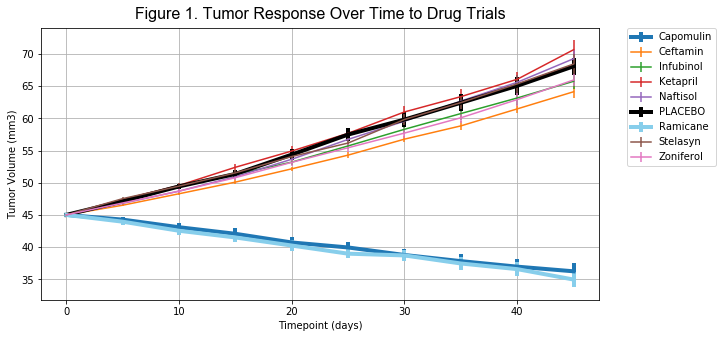

In [76]:
#multiple plots on one graph
ax = capomulin.plot(x='Timepoint', y='volume', yerr='se_volume', linewidth=4, label='Capomulin')
ceftamin.plot(x='Timepoint', y='volume', yerr='se_volume', label='Ceftamin', ax=ax)
infubinol.plot(x='Timepoint', y='volume', yerr='se_volume', label='Infubinol', ax=ax)
ketapril.plot(x='Timepoint', y='volume', yerr='se_volume', label='Ketapril', ax=ax)
naftisol.plot(x='Timepoint', y='volume', yerr='se_volume', label='Naftisol', ax=ax)
placebo.plot(x='Timepoint', y='volume', yerr='se_volume', linewidth=4, color='k', label='PLACEBO', ax=ax)
ramicane.plot(x='Timepoint', y='volume', yerr='se_volume', linewidth=4, color='skyblue', label='Ramicane', ax=ax)
stelasyn.plot(x='Timepoint', y='volume', yerr='se_volume', label='Stelasyn', ax=ax)
zoniferol.plot(x='Timepoint', y='volume', yerr='se_volume', label='Zoniferol', ax=ax)

title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'}
plt.legend()
plt.title("Figure 1. Tumor Response Over Time to Drug Trials", fontdict=title_font)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.savefig('Tumor_Response.png')

fig = plt.gcf()
fig.set_size_inches(10, 5)

plt.show()

# C. Metastatic Response to Treatment

In [33]:
# Similar basic process (to part B) to examine number of metastatic sites in this part (part C).

In [34]:
metagroups = mousetrial.groupby(['Drug', 'Timepoint']).mean().reset_index()
metagroups.head()

,Drug,Timepoint,volume,Metastatic Sites
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.160000
2,Capomulin,10,43.084291,0.320000
3,Capomulin,15,42.064317,0.375000
4,Capomulin,20,40.716325,0.652174


In [35]:
semgroupsmeta = mousetrial.groupby(['Drug', 'Timepoint']).sem().reset_index()
semgroupsmeta.head()

,Drug,Timepoint,Metastatic Sites,Mouse ID,volume
0,Capomulin,0,0.000000,NaN,0.000000
1,Capomulin,5,0.074833,NaN,0.448593
2,Capomulin,10,0.125433,NaN,0.702684
3,Capomulin,15,0.132048,NaN,0.838617
4,Capomulin,20,0.161621,NaN,0.909731


In [36]:
semgroupsmeta.drop(columns=['volume', 'Mouse ID'], inplace=True)
semgroupsmeta.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [37]:
semgroupsmeta.rename(columns={'Metastatic Sites':'metastatic_error'}, inplace=True)
semgroupsmeta.head()

,Drug,Timepoint,metastatic_error
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [38]:
metastaticgroups = pd.merge(metagroups, semgroupsmeta, how='left').set_index("Drug")
metastaticgroups.head()

,Timepoint,volume,Metastatic Sites,metastatic_error
Drug,,,,
Capomulin,0,45.000000,0.000000,0.000000
Capomulin,5,44.266086,0.160000,0.074833
Capomulin,10,43.084291,0.320000,0.125433
Capomulin,15,42.064317,0.375000,0.132048
Capomulin,20,40.716325,0.652174,0.161621


In [39]:
capomulinmeta = metastaticgroups.loc['Capomulin']
ceftaminmeta = metastaticgroups.loc['Ceftamin']
infubinolmeta = metastaticgroups.loc['Infubinol']
ketaprilmeta = metastaticgroups.loc['Ketapril']
naftisolmeta = metastaticgroups.loc['Naftisol']
placebometa = metastaticgroups.loc['Placebo']
ramicanemeta = metastaticgroups.loc['Ramicane']
stelasynmeta = metastaticgroups.loc['Stelasyn']
zoniferolmeta = metastaticgroups.loc['Zoniferol']

<Figure size 720x360 with 0 Axes>

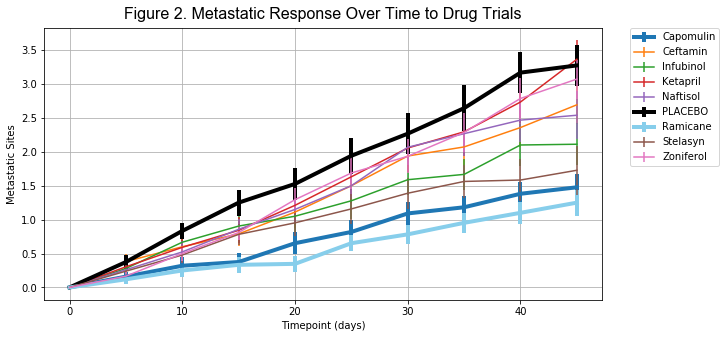

In [77]:
plt.figure(figsize=(10,5))


ax = capomulinmeta.plot(x='Timepoint', y='Metastatic Sites', yerr='metastatic_error', linewidth=4, label='Capomulin')
ceftaminmeta.plot(x='Timepoint', y='Metastatic Sites', yerr='metastatic_error', label='Ceftamin', ax=ax)
infubinolmeta.plot(x='Timepoint', y='Metastatic Sites', yerr='metastatic_error', label='Infubinol', ax=ax)
ketaprilmeta.plot(x='Timepoint', y='Metastatic Sites', yerr='metastatic_error', label='Ketapril', ax=ax)
naftisolmeta.plot(x='Timepoint', y='Metastatic Sites', yerr='metastatic_error', label='Naftisol', ax=ax)
placebometa.plot(x='Timepoint', y='Metastatic Sites', yerr='metastatic_error', linewidth=4, color='k', label='PLACEBO', ax=ax)
ramicanemeta.plot(x='Timepoint', y='Metastatic Sites', yerr='metastatic_error', linewidth=4, color='skyblue', label='Ramicane', ax=ax)
stelasynmeta.plot(x='Timepoint', y='Metastatic Sites', yerr='metastatic_error', label='Stelasyn', ax=ax)
zoniferolmeta.plot(x='Timepoint', y='Metastatic Sites', yerr='metastatic_error', label='Zoniferol', ax=ax)


plt.title("Figure 2. Metastatic Response Over Time to Drug Trials", fontdict=title_font)
plt.xlabel('Timepoint (days)')
plt.ylabel('Metastatic Sites')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.savefig('Metastatic_Response.png')

fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()


# D. Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame

In [43]:
# grouping by mouse id just to count something that indicates number of mice at timepoint by drug.
mousegroups = mousetrial.groupby(['Drug', 'Timepoint', 'Mouse ID']).count().reset_index()
mousegroups.head()

,Drug,Timepoint,Mouse ID,volume,Metastatic Sites
0,Capomulin,0,b128,1,1
1,Capomulin,0,b742,1,1
2,Capomulin,0,f966,1,1
3,Capomulin,0,g288,1,1
4,Capomulin,0,g316,1,1


In [44]:
mousedata['Mouse ID'].nunique()

249

In [45]:
mousegroups.rename(columns={'Mouse ID':'MouseID'}, inplace=True)
mousegroups.head()

,Drug,Timepoint,MouseID,volume,Metastatic Sites
0,Capomulin,0,b128,1,1
1,Capomulin,0,b742,1,1
2,Capomulin,0,f966,1,1
3,Capomulin,0,g288,1,1
4,Capomulin,0,g316,1,1


In [46]:
mousegroups['MouseID'].count()

1896

In [47]:
#Crosstab allows count of mice by each drug and timepoint
mousetable = pd.crosstab(mousegroups.Drug, mousegroups.Timepoint)
mousetable

Timepoint,0,5,10,15,20,25,30,35,40,45
Drug,,,,,,,,,,
Capomulin,25,25,25,24,23,22,22,22,21,21
Ceftamin,25,21,20,19,18,18,16,14,14,13
Infubinol,25,25,21,21,20,18,17,12,10,9
Ketapril,25,23,22,19,19,19,18,17,15,11
Naftisol,25,23,21,21,20,18,15,15,15,13
Placebo,25,24,24,20,19,17,15,14,12,11
Propriva,25,24,22,16,16,14,13,10,9,7
Ramicane,25,25,24,24,23,23,23,21,20,20
Stelasyn,25,24,22,22,20,19,18,16,12,11


In [49]:
capomulinmouse = mousetable.loc['Capomulin']
ceftaminmouse = mousetable.loc['Ceftamin']
infubinolmouse = mousetable.loc['Infubinol']
ketaprilmouse = mousetable.loc['Ketapril']
naftisolmouse = mousetable.loc['Naftisol']
placebomouse = mousetable.loc['Placebo']
ramicanemouse = mousetable.loc['Ramicane']
stelasynmouse = mousetable.loc['Stelasyn']
zoniferolmouse = mousetable.loc['Zoniferol']

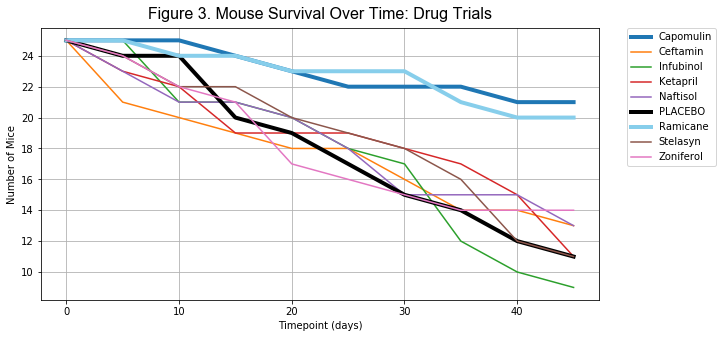

In [78]:
plt.figure(figsize=(10,5))

ax = capomulinmouse.plot(linewidth=4, label='Capomulin')
ceftaminmouse.plot(label='Ceftamin', ax=ax)
infubinolmouse.plot(label='Infubinol', ax=ax)
ketaprilmouse.plot(label='Ketapril', ax=ax)
naftisolmouse.plot(label='Naftisol', ax=ax)
placebomouse.plot(linewidth=4, color='k', label='PLACEBO', ax=ax)
ramicanemouse.plot(linewidth=4, color='skyblue', label='Ramicane', ax=ax)
stelasynmouse.plot(label='Stelasyn', ax=ax)
zoniferolmouse.plot(label='Zoniferol', ax=ax)


plt.legend()
plt.title("Figure 3. Mouse Survival Over Time: Drug Trials", fontdict=title_font)
plt.xlabel('Timepoint (days)')
plt.ylabel('Number of Mice')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.savefig('Mouse_Survival.png')


# E. Summary Bar Graph

In [52]:
# Calculate the percent changes for each drug can be obtained from existing pivot table by isolating final volumes.




In [53]:
volumepivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [54]:
druglist

array(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
       'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype=object)

In [55]:
volumepivot.reset_index()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
5,25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
6,30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
7,35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
8,40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692
9,45,36.236114,64.132421,65.755562,70.662958,69.265506,68.084082,66.258529,34.955595,68.438310,65.960888


In [56]:
#since it is the case that all volumes start at 45, all that is needed is to isolate the final row.
finalvolume = volumepivot.iloc[-1]
finalvolume

Drug
Capomulin    36.236114
Ceftamin     64.132421
Infubinol    65.755562
Ketapril     70.662958
Naftisol     69.265506
Placebo      68.084082
Propriva     66.258529
Ramicane     34.955595
Stelasyn     68.438310
Zoniferol    65.960888
Name: 45, dtype: float64

In [57]:
#computing percent change

pctchange = [((x-45)/45)*100 for x in finalvolume]
pctchange


[-19.475302667894173,
 42.51649185589744,
 46.12347172785187,
 57.028794686606076,
 53.92334713476923,
 51.29796048315153,
 47.24117486320637,
 -22.320900462766673,
 52.085134287899024,
 46.57975086509525]

In [58]:
#intended to attach bar labels.  See notes in submission and below.
barlabels = ['%.2f' % num for num in pctchange]
barlabels

['-19.48',
 '42.52',
 '46.12',
 '57.03',
 '53.92',
 '51.30',
 '47.24',
 '-22.32',
 '52.09',
 '46.58']

In [62]:
#position of bars with simple np.arange
pos = np.arange(len(druglist))

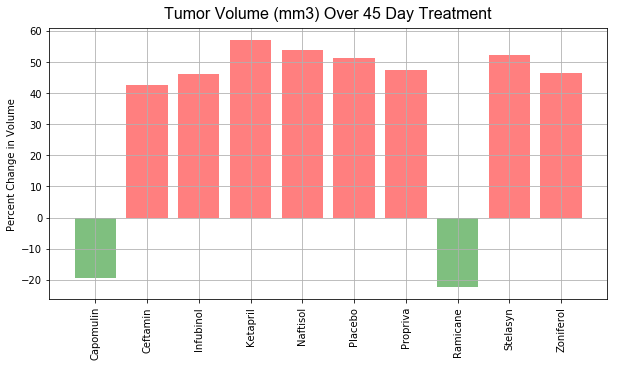

In [79]:
plt.figure(figsize=(10,5))
plt.bar(pos, pctchange, align='center', alpha=0.5, label=barlabels, color=['green', 'red', 'red', 'red', 'red', 'red', 'red', 'green', 'red', 'red'])
plt.grid(True)

plt.xticks(pos, druglist, rotation="vertical")
plt.ylabel('Percent Change in Volume')
plt.title('Tumor Volume (mm3) Over 45 Day Treatment', fontdict=title_font)
plt.savefig('Summary_chart.png')

plt.show()

In [ ]:
#I examined the workarounds that have been created to afix the number of percent change to the bars.
#However, I ran out of time and have a "emergency" medical situation of a friend that I know is going to keep me
#from playing with this. Looks like I would have to redo the plot at this point to do it because of how I constructed
#the plot.  It was a rabbit hole that there just wasn't time for but I understand the basic idea.

# F. Analyses

 1.  Tumor Shrinkage:  Two drugs seemed to have a promising effect on squamous cell carcinoma (SCC) tumor volume in this set of trials--Capomulin and Ramicane.  Of chief importance, both of these drugs resulted in shrinkage in tumor volume of mice in this 45 day study. Tumor growth persisted in all other drug conditions tested including the placebo/control condition.  Several of the drugs showed no statistically signficant difference in effect from the control.  See Figures 1 and 4.


2.  Metastatic Sites:  The same two drugs seemed to have the greatest effect on the proliferation of metastatic sites, a chief concern in the spread of skin cancer.  However, other drugs showed some promise as well in this respect including potentially Stelasyn and Infubinol. See Figure 2.

3. Mouse Survival:  Again, more mice treated with Capomulin and Ramicane survived the trials compared with other drugs tested and the control condition.  These drugs showed substantial difference from all other drugs tested.

4. Final Cautions:  It should be noted that in no trial did the drug result in 100 percent mouse survival nor did any of the drugs reduce tumor volume to zero or metastatic sites to zero.  Therefore, the above results for Capomulin and Ramicane are extremely promising although with this caution noted. Longer trials and more itensive studies comparing dosing regimes should be considered as next steps.